In [1]:
from transformers import CLIPProcessor, CLIPModel
import torch
import torchvision
from torchvision.models import resnet50
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import clip
from PIL import Image
import requests



In [ ]:
import torch
print(torch.__version__)
print('test')

In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda:0')    
print(device)

cuda:0


In [3]:
model, preprocess = clip.load("ViT-B/32", device=device)

In [4]:
import pickle
# with open('embeddings.pkl', 'wb') as f:
#     pickle.dump(dict_visual_embeddings, f)
    
with open('embeddings.pkl', 'rb') as f:
     embeddings = pickle.load(f)

In [5]:
stackembeddings = []
for i in range(10):
    stackembeddings.append(torch.cat(embeddings[i]))

In [6]:
stackembeddings = torch.cat(stackembeddings)

In [7]:
transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])

data_viz = torchvision.datasets.ImageFolder(
    "/home/amildravid/SpeechVision/animals/raw-img",
    transform=transform
)


In [14]:
def get_image(text):
    text=clip.tokenize([text]).to(device)
    text_features = model.encode_text(text)
    scores = torch.einsum('ab, cb -> ac', stackembeddings, text_features)
    idx = torch.argmax(scores)
    plt.imshow(np.transpose(data_viz[idx][0], (1,2,0)))
    plt.axis("off")

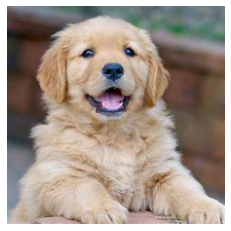

In [27]:
get_image("golden retriever puppies are the best")